In [7]:
### Deepxde code

In [1]:
import deepxde as dde
import numpy as np
#constants
D = 0.1
x0 = 0.5 #centre of Guassian
sigma = 0.1 #standard deviation of Guassian
#PDE
def pde(x, u):
    u_t = dde.grad.jacobian(u, x, i = 0, j = 1)
    u_xx = dde.grad.hessian(u, x, i = 0, j = 0)
    return u_t-D*u_xx
#geometry and timedomain
geom = dde.geometry.Interval(0,1)
timedomain = dde.geometry.TimeDomain(0,1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)
#boundary and intial conditions
scale_factor = 1
bc = dde.DirichletBC(geomtime, lambda x:0, lambda _, on_boundary : on_boundary)
ic = dde.IC(geomtime, 
            lambda x:scale_factor*np.exp(-((x[:, 0:1] - x0) **2)/(2*sigma**2)),
            lambda _, on_initial:on_initial)
#data
data = dde.data.TimePDE(geomtime, pde, [bc, ic], num_domain = 256, num_boundary = 100, num_initial = 100)
#neural network
net = dde.maps.FNN([2] + [5]* 3 + [1], 'tanh', 'Glorot normal')
model = dde.Model(data, net)
model.compile('adam', lr = 1e-3)
losshistory, train_state = model.train(epochs = 50000) 
X = geomtime.random_points(10000)
u_pred = model.predict(X)

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
Compiling model...
Building feed-forward neural network...

'build' took 1.865006 s


'compile' took 3.825223 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.12e-01, 1.27e-01, 3.30e-01]    [6.12e-01, 1.27e-01, 3.30e-01]    []  
1000      [6.69e-03, 2.72e-03, 8.87e-02]    [6.69e-03, 2.72e-03, 8.87e-02]    []  
2000      [4.57e-03, 1.61e-03, 5.89e-02]    [4.57e-03, 1.61e-03, 5.89e-02]    []  
3000      [2.99e-03, 2.68e-03, 4.88e-02]    [2.99e-03, 2.68e-03, 4.88e-02]    []  
4000      [4.12e-03, 2.78e-03, 4.12e-02]    [4.12e-03, 2.78e-03, 4.12e-02]    []  
5000      [4.18e-03, 2.92e-03, 3.64e-02]    [4.18e-03, 2.92e-03, 3.64e-02]    []  
6000      [4.32e-03, 2.00e-03, 2.43e-02]    [4.32e-03, 2.00e-03, 2.43e-02]    []  
7000      [5.02e-03, 1.10e-03, 1.04e-02]    [5.02e-03, 1.10e-03, 1.04e-02]    []  
8000      [4.80e-03, 1.20e-0

In [2]:
x_uniform = np.linspace(0, 1, 1000)  # 1000 points uniformly spaced in [0, 1]
t_fixed = 0.5  # Fixed time for prediction
t_array = np.full_like(x_uniform, t_fixed)
X = np.column_stack((x_uniform, t_array))
u_pred = model.predict(X)


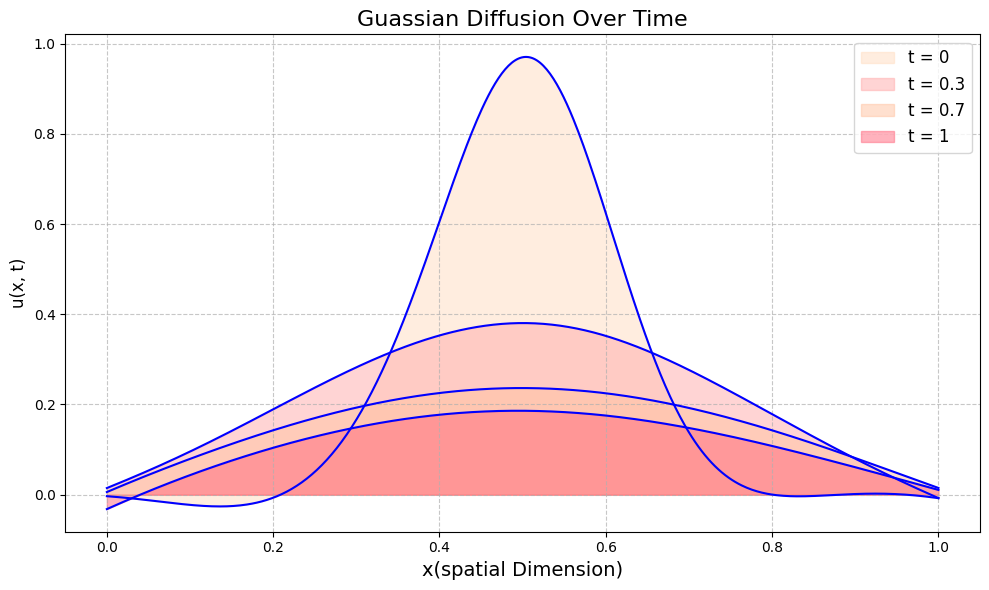

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,500)
time_steps = [0,0.3,0.7,1]
u_preds = []
for t in time_steps:
    X = np.hstack((x[:, None], np.full_like(x[:, None], t)))
    u_pred = model.predict(X)
    u_preds.append(u_pred.flatten())
plt.figure(figsize = (10,6))
colors = ["#FFDDC1", "#FFABAB", "#FFC3A0", "#FF677D"]
for i, t in enumerate(time_steps):
    plt.fill_between(x, u_preds[i], color = colors[i], alpha = 0.5, label = f't = {t}')
    plt.plot(x, u_preds[i], color = 'blue', lw = 1.5)
plt.title('Guassian Diffusion Over Time', fontsize = 16)
plt.xlabel('x(spatial Dimension)', fontsize = 14)
plt.ylabel('u(x, t)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

Relative Error: 0.6207141280174255


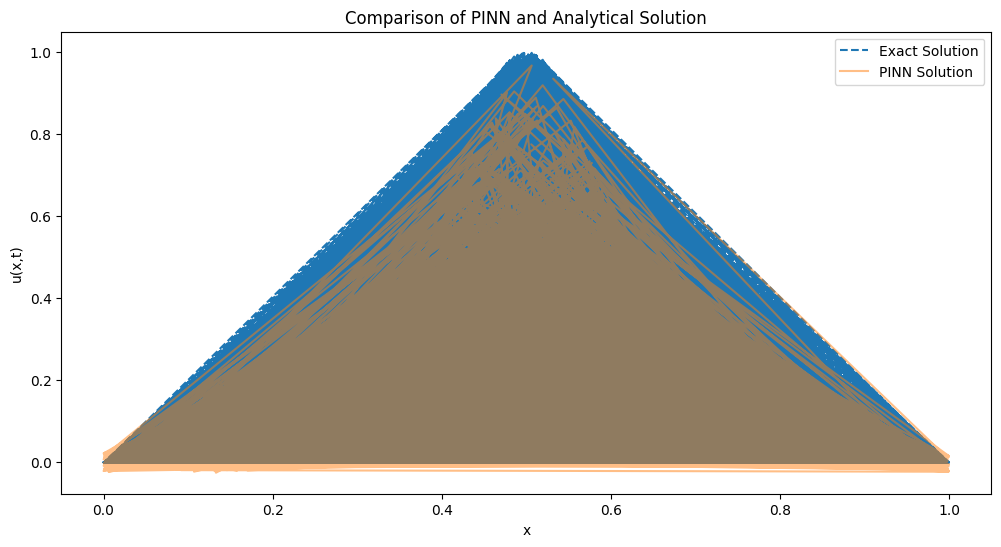

In [4]:
def analytical_solution(x, t):
    factor = 1/np.sqrt(1+2*D*t)
    exponent = -((x-x0)**2)/(2*sigma**2*(1+2*D*t))
    return factor*np.exp(exponent)
X = geomtime.random_points(10000)
x = X[:, 0:1]
t = X[:, 1:2]
u_exact = analytical_solution(x, t)
u_pinn = model.predict(X)
error = np.linalg.norm(u_exact - u_pinn)/np.linalg.norm(u_exact)
print(f"Relative Error: {error}")
plt.figure(figsize = (12, 6))
plt.plot(x, u_exact, label = 'Exact Solution', linestyle = '--')
plt.plot(x, u_pinn, label = 'PINN Solution', alpha = 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title("Comparison of PINN and Analytical Solution")
plt.show()

### Pytorch code 

Epoch 0, Loss: 0.18795935809612274
Epoch 500, Loss: 0.007769083604216576
Epoch 1000, Loss: 0.0003000993747264147
Epoch 1500, Loss: 0.0009246919071301818
Epoch 2000, Loss: 0.000170375409652479
Epoch 2500, Loss: 7.355948037002236e-05
Epoch 3000, Loss: 0.00012636878818739206
Epoch 3500, Loss: 3.984364593634382e-05
Epoch 4000, Loss: 4.105321932001971e-05
Epoch 4500, Loss: 2.4597309675300494e-05
Epoch 5000, Loss: 2.527317155909259e-05
Epoch 5500, Loss: 2.178908107453026e-05
Epoch 6000, Loss: 1.887207690742798e-05
Epoch 6500, Loss: 1.768616675690282e-05
Epoch 7000, Loss: 1.6648831660859287e-05
Epoch 7500, Loss: 1.637830791878514e-05
Epoch 8000, Loss: 7.161697431001812e-05
Epoch 8500, Loss: 0.00010399321763543412
Epoch 9000, Loss: 4.6878405555617064e-05
Epoch 9500, Loss: 2.932321331172716e-05
Epoch 10000, Loss: 1.3430720173346344e-05
Epoch 10500, Loss: 5.664580385200679e-05
Epoch 11000, Loss: 2.70336568064522e-05
Epoch 11500, Loss: 0.00014571708743460476
Epoch 12000, Loss: 3.6503493902273476e

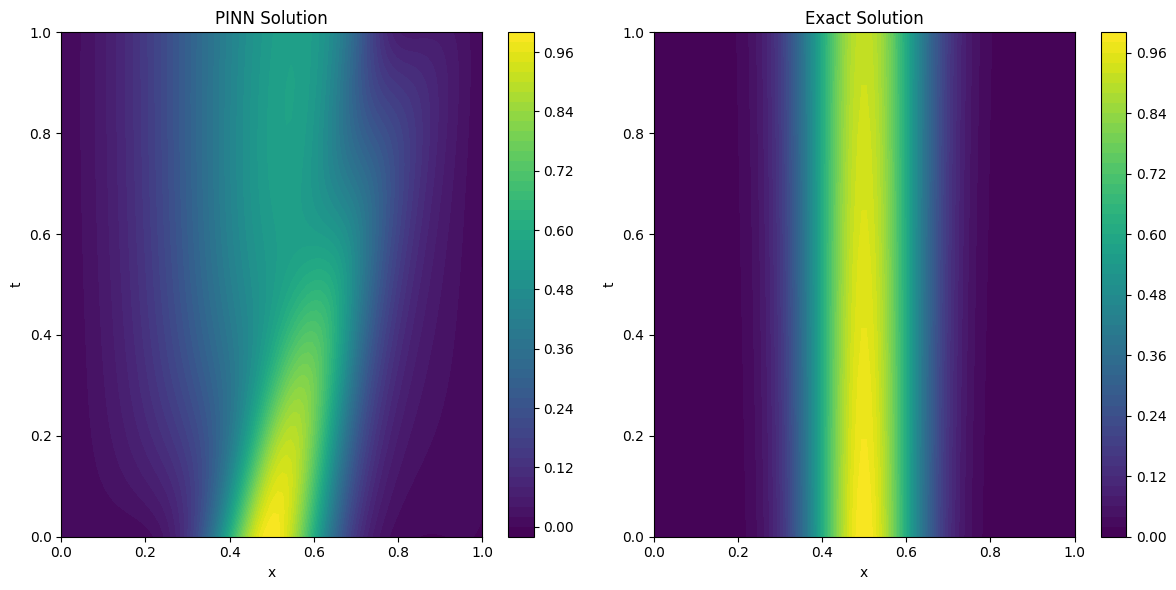

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
#constants
D = 0.1
x0 = 0.5 #centre of Guassian
sigma = 0.1 #standard deviation of Guassian
epochs = 20000
lr = 1e-3
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2,50),
            nn.Tanh(),
            nn.Linear(50,50),
            nn.Tanh(),
            nn.Linear(50,1)
        )
    def forward(self, x, t):
        inputs = torch.cat([x,t], dim = 1)
        return self.net(inputs)
def pde_loss(model, x, t):
    x.requires_grad = True
    t.requires_grad = True
    u = model(x, t)
    u_t = torch.autograd.grad(u, t, grad_outputs = torch.ones_like(u), retain_graph = True, create_graph = True)[0]
    u_x = torch.autograd.grad(u, x, grad_outputs = torch.ones_like(u), retain_graph = True, create_graph = True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs = torch.ones_like(u_x),retain_graph = True, create_graph = True)[0]
    return torch.mean((u_t - D*u_xx)**2)

def boundary_loss(model,x_boundary, t_boundary):
    u_boundary = model(x_boundary, t_boundary)
    return torch.mean(u_boundary**2)
def initial_loss(model, x_initial,t_initial):
    u_initial = model(x_initial, t_initial)
    u_true = torch.exp(-((x_initial - x0)**2)/(2*sigma**2))
    return torch.mean((u_initial - u_true)**2)
def generate_data(n_points):
    x = torch.linspace(0,1, n_points).view(-1,1)
    t = torch.linspace(0,1,n_points).view(-1,1)
    x_boundary = torch.cat([torch.zeros_like(t), torch.ones_like(t)], dim = 0)
    t_boundary = torch.cat([t,t], dim = 0)
    x_initial = x
    t_initial = torch.zeros_like(x)
    return x, t, x_boundary, t_boundary, x_initial, t_initial
model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
x, t, x_boundary, t_boundary, x_initial, t_initial = generate_data(100)
for epoch in range(epochs):
    optimizer.zero_grad()
    loss_pde = pde_loss(model, x, t)
    loss_bc = boundary_loss(model, x_boundary, t_boundary)
    loss_ic = initial_loss(model, x_initial, t_initial)
    loss = loss_pde + loss_bc + loss_ic
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
n_test = 100
x_test = torch.linspace(0,1,n_test).view(-1,1)
t_test = torch.linspace(0,1,n_test).view(-1,1)
x_mesh, t_mesh = torch.meshgrid(x_test.squeeze(), t_test.squeeze(), indexing = 'ij')
x_test_flat = x_mesh.flatten().view(-1,1)
t_test_flat = t_mesh.flatten().view(-1,1)
u_pred = model(x_test_flat, t_test_flat).detach().numpy()
u_pred = u_pred.reshape(n_test, n_test)
t_test_np = t_test.numpy()
x_test_np = x_test.numpy()
u_exact = (1/np.sqrt(1+2*D*t_test_np.T))*np.exp(-((x_test_np - x0)**2)/(2*sigma**2*(1+2*D*t_test_np.T)))

plt.figure(figsize = (12, 6))
# PINN solution
plt.subplot(1,2,1)
plt.contourf(x_mesh.numpy(), t_mesh.numpy(), u_pred, levels = 50, cmap = 'viridis')
plt.colorbar()
plt.title("PINN Solution")
plt.xlabel("x")
plt.ylabel("t")

# Exact solution
plt.subplot(1,2,2)
plt.contourf(x_mesh.numpy(), t_mesh.numpy(), u_exact, levels = 50, cmap = 'viridis')
plt.colorbar()
plt.title("Exact Solution")
plt.xlabel("x")
plt.ylabel("t")

plt.tight_layout()
plt.show()

In [6]:
u_exact_flat = u_exact.flatten()
u_pred_flat = u_pred.flatten()
relative_error = np.linalg.norm(u_exact_flat - u_pred_flat)/np.linalg.norm(u_exact_flat)
print(f'Relative Error: { relative_error:.4f}')

Relative Error: 0.3743
